<a href="https://colab.research.google.com/github/aboda1997/getting-started-with-tensorflow/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import  Sequential  
from tensorflow.keras.layers import Dense , Flatten ,Dropout ,  BatchNormalization , MaxPooling2D , Conv2D    
from  tensorflow.keras import regularizers 
from tensorflow.keras.callbacks import  EarlyStopping  , ReduceLROnPlateau ,ModelCheckpoint 
%matplotlib inline


![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Run this cell to load the dataset
train = loadmat('/content/gdrive/My Drive/project_files/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/project_files/test_32x32.mat')


Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
x_train , y_train , x_test ,y_test = train["X" ] , train["y"] , test["X"] , test["y"]

73257


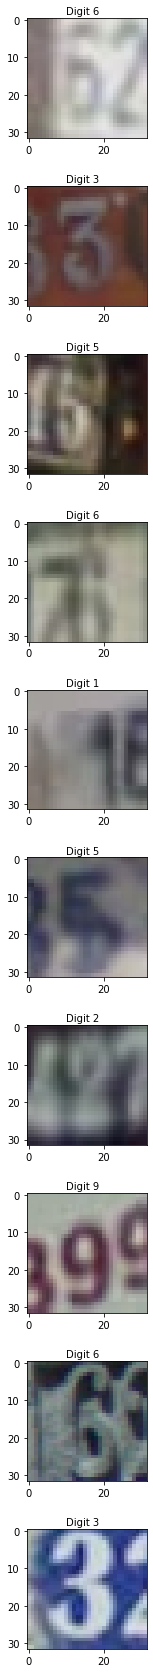

In [ ]:



num = x_train.shape[3 ] 
print(num)
random_index = np.random.choice( num, 10)
imgs = x_train[ ...,random_index]
labels = y_train[random_index]
fig, axes = plt.subplots(10, figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i , ( im ,label ) in  enumerate(zip(range(0,10)  ,labels)):
    axes[i].imshow(np.squeeze(imgs[:,:,:,im]))
    axes[i].text(10., -1.5, f'Digit {label[0]}')
    
plt.show()

In [ ]:
#tf.image.rgb_to_grayscale(x_train)
x_train_gray = np.zeros((x_train.shape[3],32,32,1))
x_test_gray = np.zeros((x_test.shape[3],32,32,1))
for i in range(x_train.shape[3]):
    x_train_gray[i,:,:,:] = tf.image.rgb_to_grayscale(x_train[:,:,:,i])

for i in range(x_test.shape[3]):
    x_test_gray[i,:,:,:] = tf.image.rgb_to_grayscale(x_test[:,:,:,i])


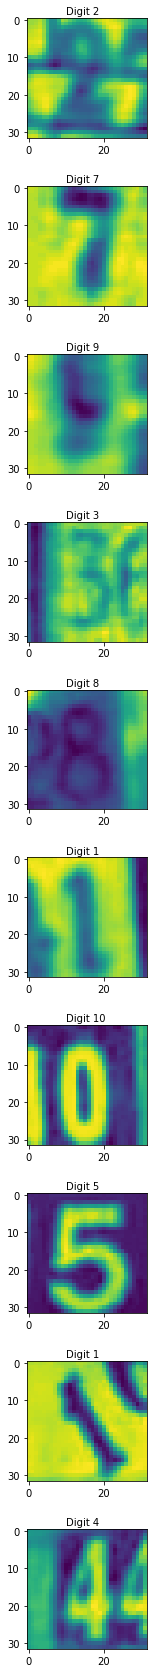

In [ ]:
num = x_train_gray.shape[0 ] 
random_index = np.random.choice( num, 10)
imgs_gray = x_train_gray[ random_index,...]
labels = y_train[random_index]
fig, axes = plt.subplots(10, figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i,( img ,label ) in  enumerate(zip( imgs_gray,labels)):
    axes[i].imshow(np.squeeze(img))
    axes[i].text(10., -1.5, f'Digit {label[0]}')
    
plt.show()


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
train_targets = tf.keras.utils.to_categorical(np.array(y_train))
test_targets = tf.keras.utils.to_categorical(np.array(y_test))

In [ ]:
def get_MLP_model(input_shape):
    model = Sequential([
        Flatten(input_shape = input_shape),
        Dense(128, activation = "relu" ,kernel_initializer='he_uniform', bias_initializer='ones' ), 
        Dense(128, activation= "relu" ),
        Dense(64, activation= "relu" ),
        Dense(11, activation= "softmax" ),




        
    ])
    opt = tf.keras.optimizers.Adam(learning_rate = .0001)
    loss = "categorical_crossentropy"
    acc = ["accuracy" ]
    model.compile(
    optimizer = opt , 
        loss = loss ,
        metrics = acc )
    
    return model  
    

In [ ]:
input_shape = x_train_gray[0].shape
model = get_MLP_model(input_shape ) 
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 11)                715       
Total params: 156,683
Trainable params: 156,683
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
def get_callbacks(checkpoint_path):
    
    checkpoint = ModelCheckpoint(checkpoint_path , monitor="val_accuracy",  mode= "max", save_weights_only=True ,
                                 save_best_only= True , verbose= 1)
    earlystopping = EarlyStopping( monitor= "val_accuracy",  patience= 5 ,   verbose = 1 ,   mode =  "max" )
    learning_rate_reduction = ReduceLROnPlateau(monitor= "loss", factor=0.2 , patience= 20 , mode ="min")
    return ( checkpoint , earlystopping , learning_rate_reduction )
 

    

In [ ]:
checkpoint_path = 'checkpoints_best_only_MLP'
checkpoint , earlystopping ,  learning_rate_reduction = get_callbacks(checkpoint_path) 
callbacks = [checkpoint , earlystopping ,  learning_rate_reduction ]

In [ ]:
def train_model(model , x_train_gray , train_targets , epochs ):
    history = model.fit(x_train_gray , train_targets ,  validation_split= .15 , epochs= epochs ,  
                        batch_size= 40, callbacks =callbacks , verbose= 1)
    return  history 

In [ ]:
history = train_model(model , x_train_gray , train_targets , 30)

Epoch 1/30
1538/1557 [============================>.] - ETA: 0s - loss: 5.5168 - accuracy: 0.1969
Epoch 00001: val_accuracy improved from -inf to 0.28392, saving model to checkpoints_best_only_MLP
1557/1557 [==============================] - 5s 3ms/step - loss: 5.4869 - accuracy: 0.1974 - val_loss: 2.9366 - val_accuracy: 0.2839
Epoch 2/30
1539/1557 [============================>.] - ETA: 0s - loss: 2.3804 - accuracy: 0.3583
Epoch 00002: val_accuracy improved from 0.28392 to 0.41696, saving model to checkpoints_best_only_MLP
1557/1557 [==============================] - 5s 3ms/step - loss: 2.3789 - accuracy: 0.3587 - val_loss: 1.9978 - val_accuracy: 0.4170
Epoch 3/30
1544/1557 [============================>.] - ETA: 0s - loss: 1.7969 - accuracy: 0.4735
Epoch 00003: val_accuracy improved from 0.41696 to 0.49204, saving model to checkpoints_best_only_MLP
1557/1557 [==============================] - 4s 3ms/step - loss: 1.7972 - accuracy: 0.4737 - val_loss: 1.6834 - val_accuracy: 0.4920
Epoc

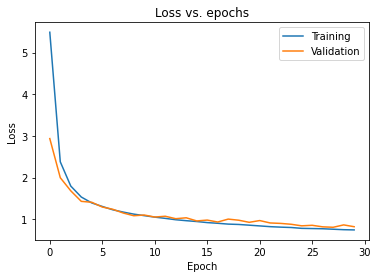

In [ ]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

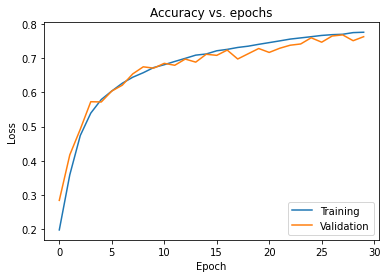

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
test_loss, test_acc = model.evaluate(x_test_gray,test_targets , verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.973
Test accuracy: 73.44%


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
def get_CNN_model(input_shape , rate):
    model = Sequential([

        Conv2D(filters= 16 , kernel_size= (3,3),  padding= "SAME" , input_shape = input_shape,  kernel_initializer='he_uniform', bias_initializer='ones',
               activation= "relu" ,name = "conv_1"),
        Dropout(rate),


        Conv2D(filters= 8 ,  kernel_size= (3,3) ,  activation= "relu" ,  padding = "SAME" , name = 'conv_2'),
        
        Dropout(rate),

        BatchNormalization(),

       
        Dropout(rate),


        Conv2D(filters= 8 ,  kernel_size= (3,3) ,  activation= "relu" ,  padding = "SAME" , name = 'conv_3'),
        Dropout(rate),

        MaxPooling2D(pool_size=(4,4), name = "pool_1"),


        BatchNormalization(),

        


        Flatten(),
        Dense(128, activation= "relu" ),
        Dropout(rate),


        Dense(32, activation= "relu" ),


        Dense(11, activation= "softmax" ),
])
    
    opt = tf.keras.optimizers.Adam(learning_rate = .0001)
    loss = "categorical_crossentropy"
    acc = ["accuracy" ]
    model.compile(
    optimizer = opt , 
        loss = loss ,
        metrics = acc )
    
    return model  
    

In [ ]:
input_shape = x_train_gray[0].shape
model = get_CNN_model(input_shape  ,rate = .2) 
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 8)         1160      
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 32, 8)       

In [ ]:
path = "checkpoints_best_only_CNN"
checkpoint , earlystopping ,  learning_rate_reduction = get_callbacks(path) 
callbacks = [checkpoint , earlystopping ,  learning_rate_reduction ]

In [ ]:
def train_model(model , x_train_gray , train_targets , epochs ):
    history = model.fit(x_train_gray , train_targets ,  validation_split= .15 , epochs= epochs ,  
                         callbacks =callbacks , verbose= 1)
    return  history 

In [ ]:
history = train_model(model , x_train_gray , train_targets , 30 )

Epoch 1/30
1940/1946 [============================>.] - ETA: 0s - loss: 2.3225 - accuracy: 0.1713
Epoch 00001: val_accuracy improved from -inf to 0.13914, saving model to checkpoints_best_only_CNN
1946/1946 [==============================] - 9s 4ms/step - loss: 2.3222 - accuracy: 0.1714 - val_loss: 2.3698 - val_accuracy: 0.1391
Epoch 2/30
1946/1946 [==============================] - ETA: 0s - loss: 2.0565 - accuracy: 0.2769
Epoch 00002: val_accuracy improved from 0.13914 to 0.33424, saving model to checkpoints_best_only_CNN
1946/1946 [==============================] - 8s 4ms/step - loss: 2.0565 - accuracy: 0.2769 - val_loss: 1.8565 - val_accuracy: 0.3342
Epoch 3/30
1938/1946 [============================>.] - ETA: 0s - loss: 1.4600 - accuracy: 0.5127
Epoch 00003: val_accuracy improved from 0.33424 to 0.58513, saving model to checkpoints_best_only_CNN
1946/1946 [==============================] - 8s 4ms/step - loss: 1.4588 - accuracy: 0.5132 - val_loss: 1.2865 - val_accuracy: 0.5851
Epoc

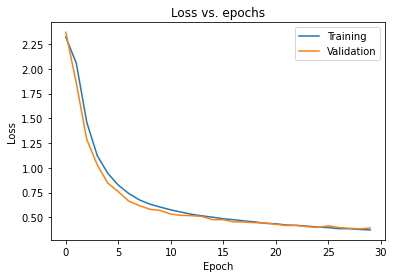

In [ ]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

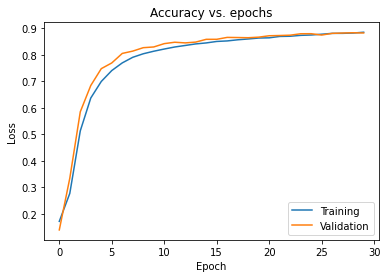

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
test_loss, test_acc = model.evaluate(x_test_gray, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.435
Test accuracy: 87.09%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
def load_model(model ,  path):
    model.load_weights(path)
    return model    

In [ ]:
MLP_model = load_model(get_MLP_model(input_shape) , "checkpoints_best_only_MLP")
CNN_model = load_model(get_CNN_model(input_shape ,rate =.2) , "checkpoints_best_only_CNN")

In [ ]:
num = x_test_gray.shape[0] 
random_indx = np.random.choice(num , 5)
random_test_images = x_test_gray[random_indx,...]
random_test_labels = y_test[random_indx ]
predictions_MLP = MLP_model.predict(random_test_images)
predictions_CNN  = CNN_model.predict(random_test_images)


In [ ]:
test_loss, test_acc = MLP_model.evaluate(x_test_gray,test_targets , verbose=0)
print("Test loss_MLP: {:.3f}\nTest accuracy_MLP: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss_MLP: 0.952
Test accuracy_MLP: 74.17%


In [ ]:
test_loss, test_acc = CNN_model.evaluate(x_test_gray,test_targets , verbose=0)
print("Test loss_CNN: {:.3f}\nTest accuracy_CNN: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss_CNN: 0.429
Test accuracy_CNN: 87.30%


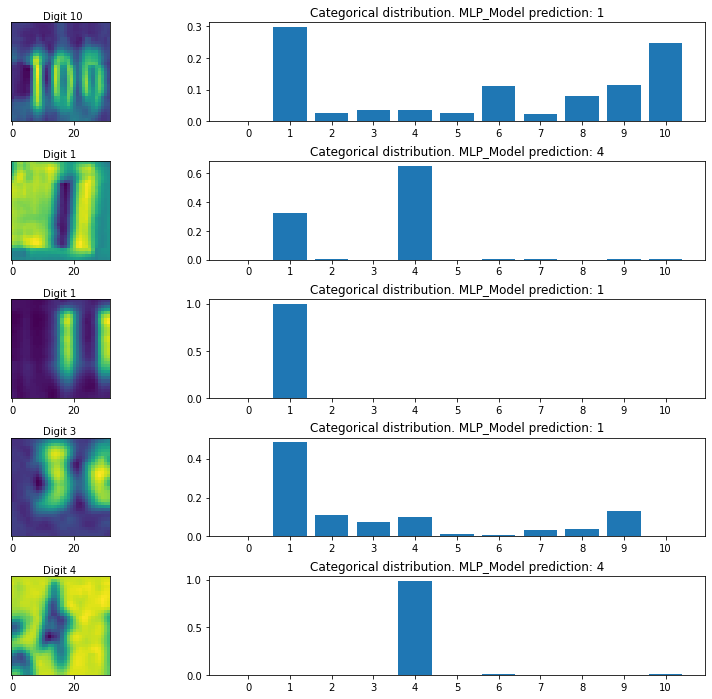

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions_MLP, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    #print(image.shape)
    axes[i, 0].get_xaxis().set_visible(True)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label[0]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. MLP_Model prediction: {np.argmax(prediction)}")
    
plt.show()

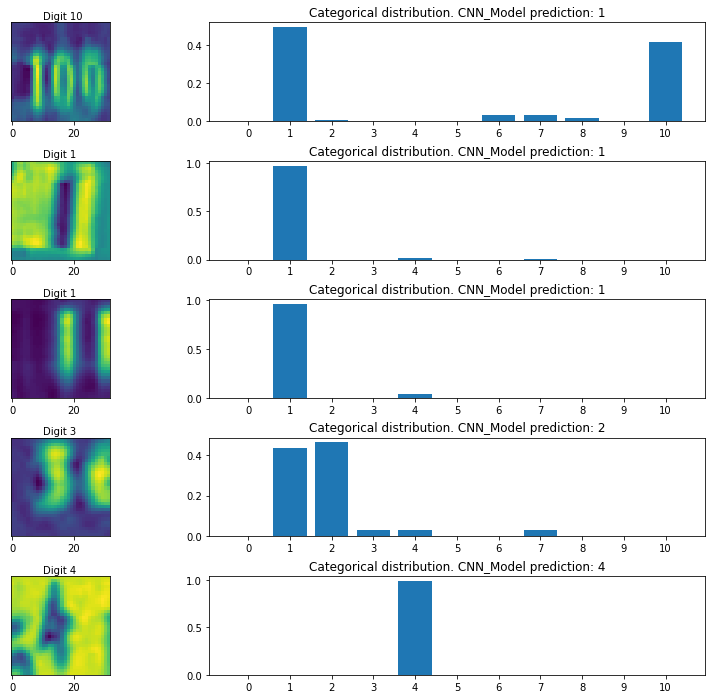

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions_CNN, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    #print(image.shape)
    axes[i, 0].get_xaxis().set_visible(True)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label[0]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. CNN_Model prediction: {np.argmax(prediction)}")
    
plt.show()